In [ ]:
from google.colab import files
myfile = files.upload()

In [ ]:
import numpy as np 
import pandas as pd 
import io

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv(io.BytesIO(myfile['adult_data.csv']))
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
columns = df.columns.to_list()
columns

In [ ]:
df.info()

# Null 값 확인

In [ ]:
data.isnull().sum(axis = 0)

- data set을 보게 되면, is_null 값이 없는 것을 확인할 수 있지만, Null 값 대신에 "?" 로 값이 대체되어있는 것을 확인 가능하다.

In [ ]:
for i in columns:
    if df.dtypes[i]==np.object:
        count = df[df[i]==' ?']['age'].count()
        print("{} value has {} ? values ".format(i,count))

- 보게 되면, __work_class__ 는 1836개의  "?" 값과 __occupation__ 는 1843개의 "?" 마지막으로 __native-country__ 값은 583개의 "?" 데이터를 가지고 있다

In [ ]:
# 제일 많은 "?" 의 값을 가지고 있는 'occupation' 을 drop 시켜준다.
data_drop = data[data[" occupation"]!=" ?"]
data_drop.reset_index()
data_drop.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Basic Graphing Of Data

In [ ]:
# plt 및 sns 세팅
plt.rcParams['figure.figsize'] = [12,8]
sns.set(style = 'whitegrid')

### 카테고리형 value 분석 

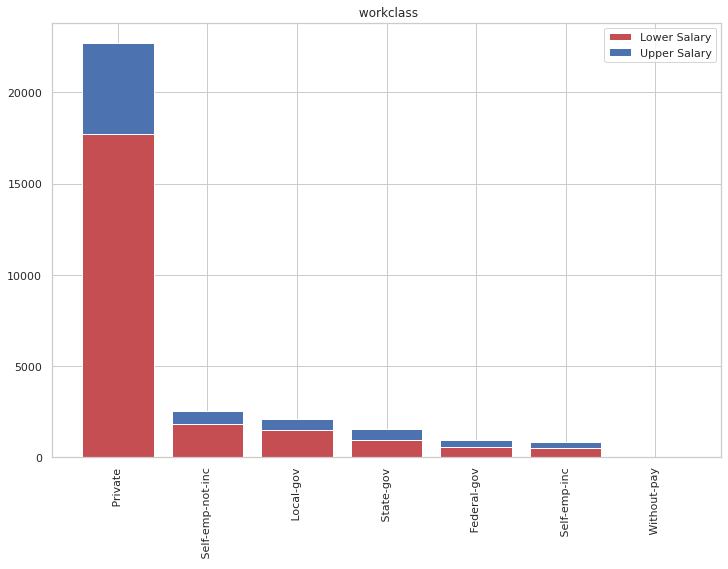

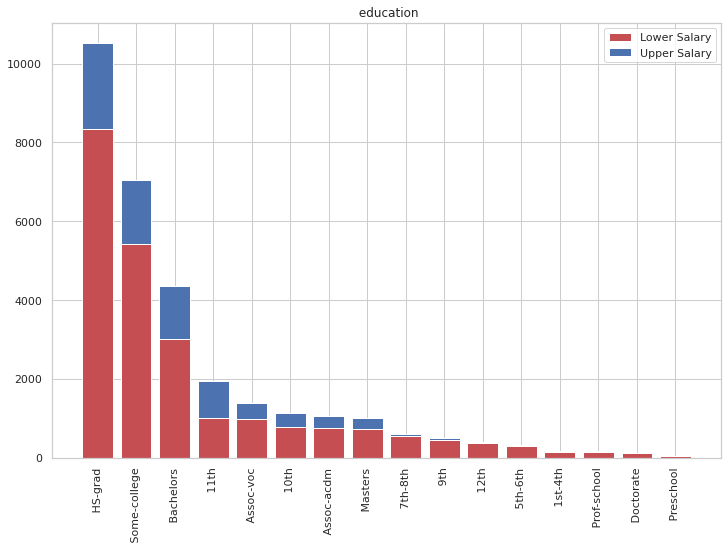

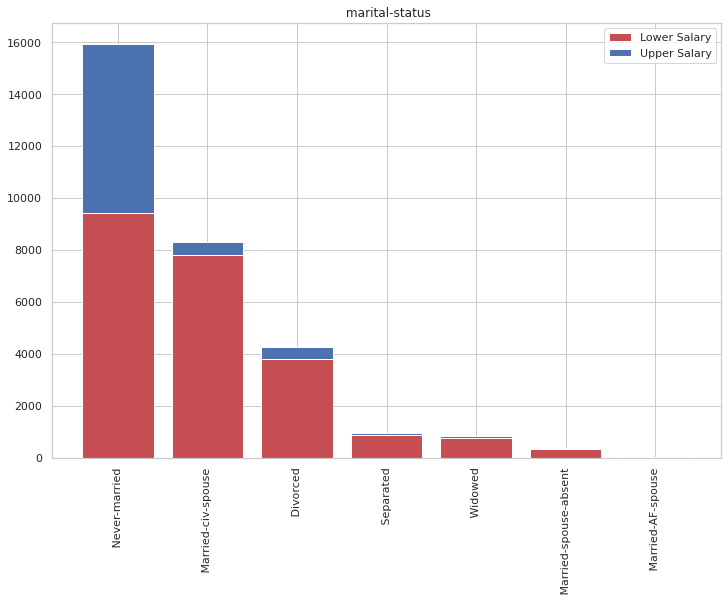

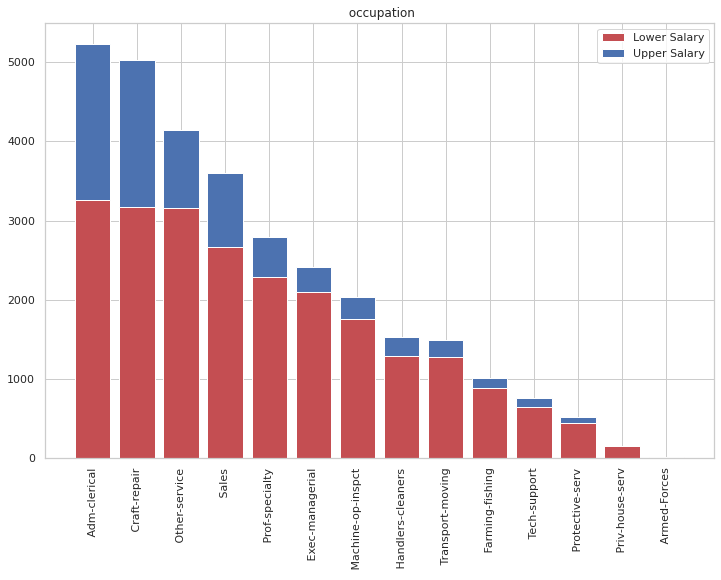

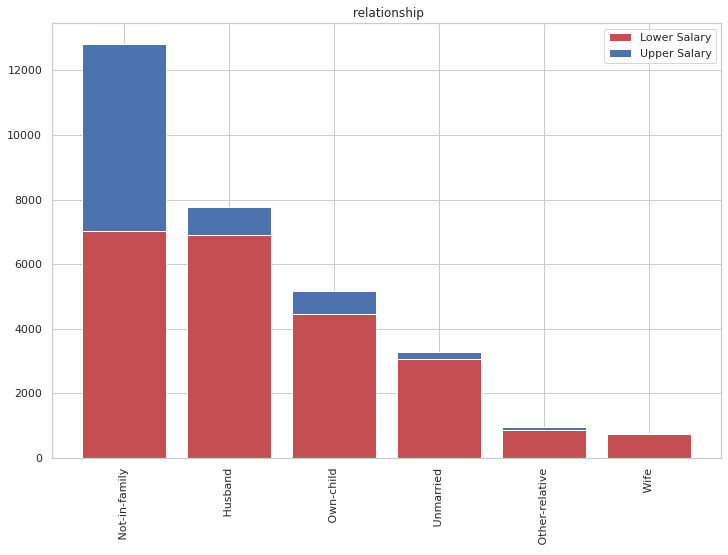

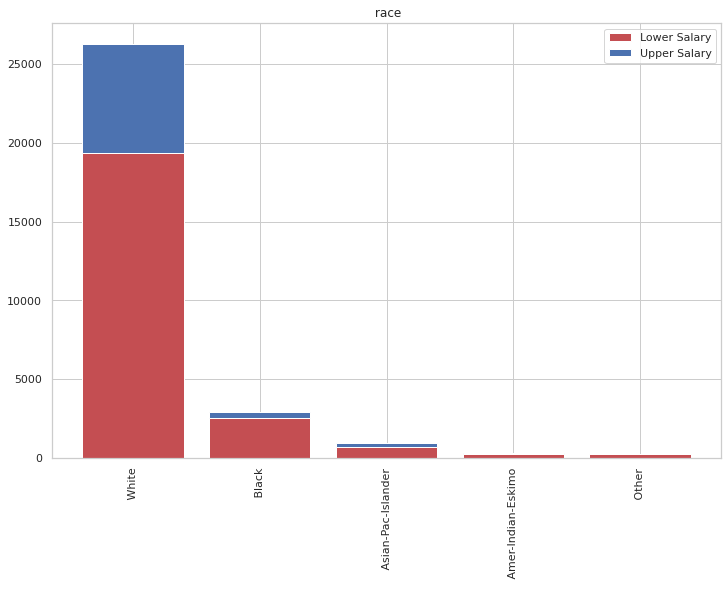

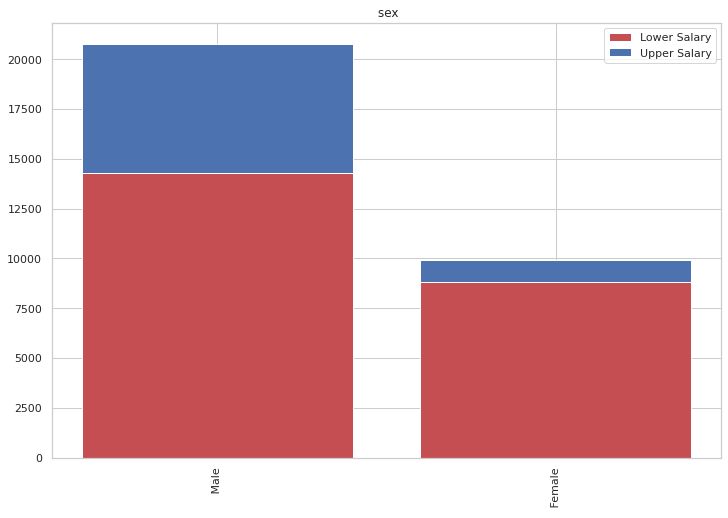

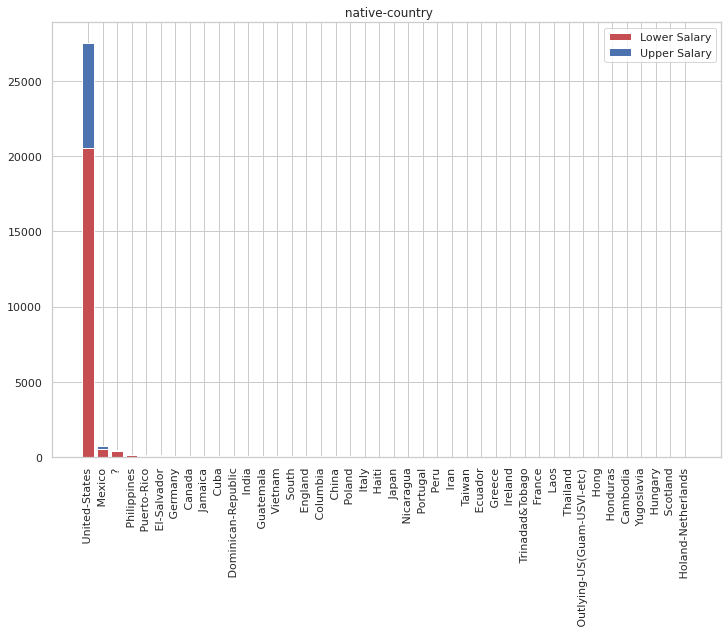

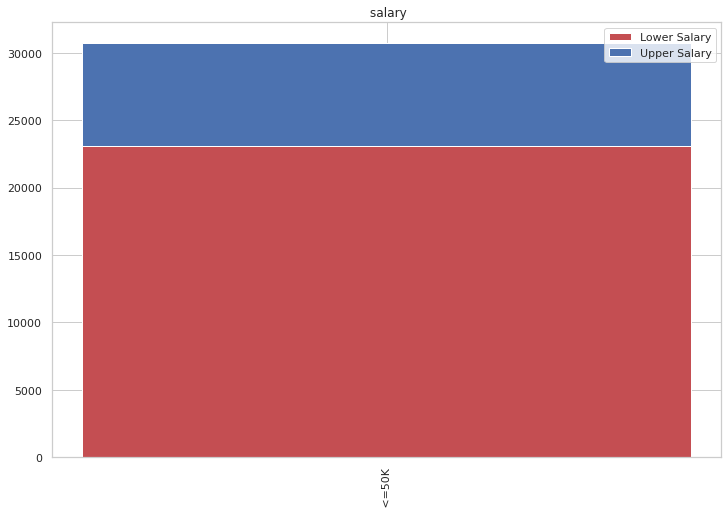

In [ ]:
# Categorical data

for i in columns:
    if data_drop.dtypes[i]==np.object:
        y1 = dict(data_drop[data_drop[' salary']==' <=50K'][i].value_counts())
        y2 = dict(data_drop[data_drop[' salary']==' >50K'][i].value_counts())
        x = y1.keys() if len(y1.keys()) >= len(y2.keys()) else y2.keys()
        if len(y1.keys()) != len(y2.keys()):
            for k in x:
                if k not in y2.keys():
                    y2[k] = 0
                if k not in y1.keys():
                    y1[k] = 0
        
        plt.bar(x, list(y1.values()), color='r', label = 'Lower Salary')
        plt.bar(x, list(y2.values()), bottom=list(y1.values()), color='b', label = 'Upper Salary')
        plt.xticks(rotation=90)
        plt.legend()
        plt.title(i)
        plt.show()

### Capital Loss 와 Capital gain 과의 그래프
- 'capital Loss' 와 'Capital gain'의 경우, 둘다 0이 될 수 있다.
- 'Loss' 가 0일경우, 'Gain'이 0보다 큰 경우가 많다.
- 'Gain' 이 0일경우, 'Loss'가 0보다 큰 경우가 많다.



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


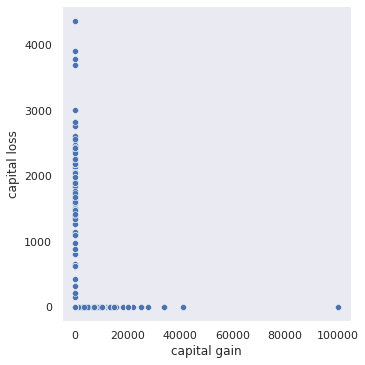

In [90]:
sns.relplot(' capital-gain',' capital-loss', data= data_drop)
plt.xlabel("capital gain")
plt.ylabel("capital loss")
plt.show()

### work class 와 salary 간의 관계


- Hs grad, Some-college, Bachelors, Masters 와 같은 경우 평균적으로 높은 Salary를 가지는 것을 볼 수 있다.

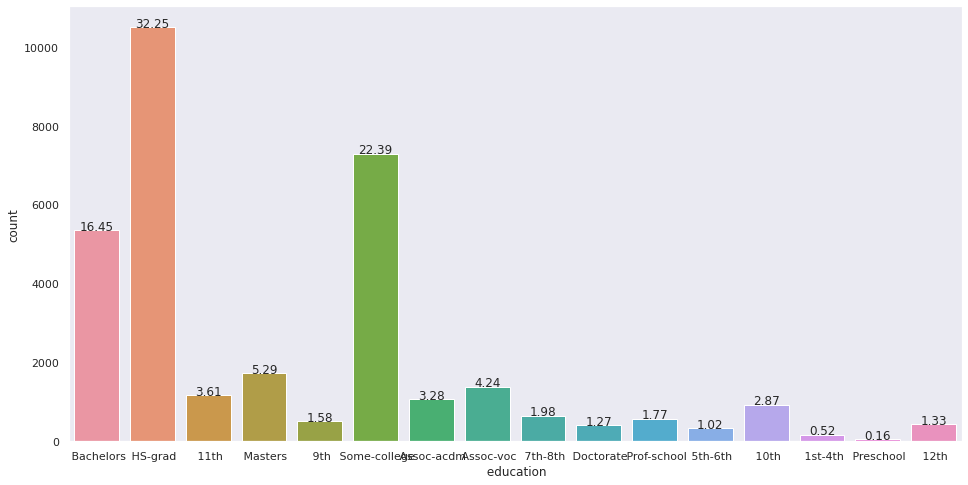

In [95]:
plt.figure(figsize=(16,8))

total = float(len(df[" salary"]) )

ax = sns.countplot(x=" education", data=df[df[" education"] != " ?"])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,   
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

### Continuous Value 값 분석

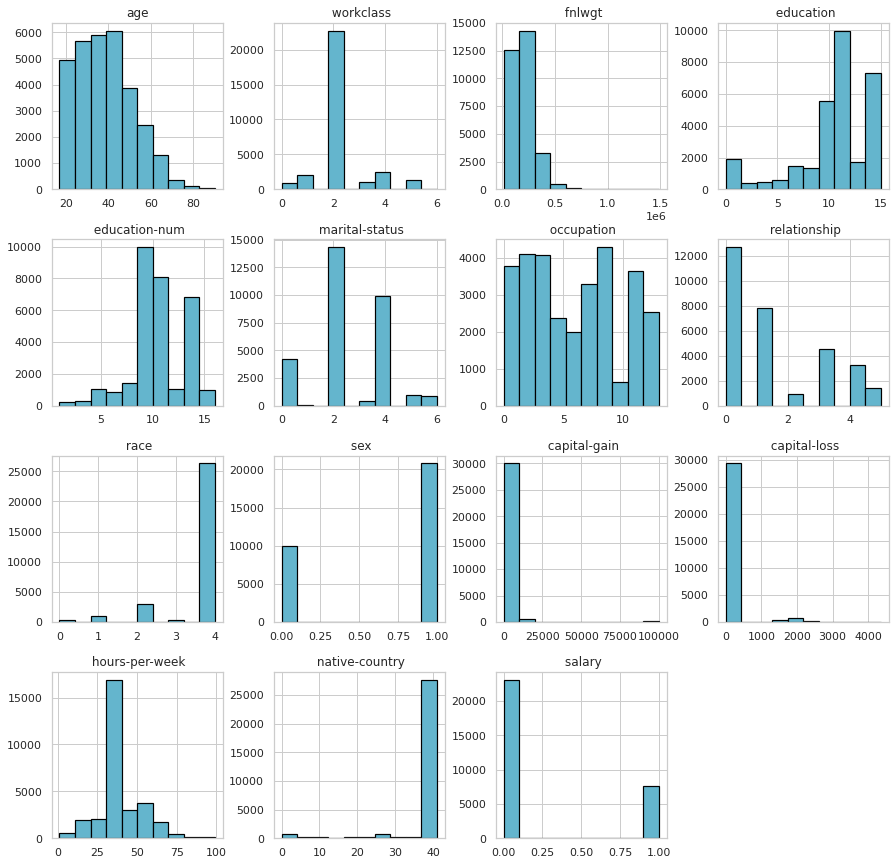

In [ ]:
distribution = data_drop.hist(edgecolor = 'black', linewidth = 1.2, color = 'c')
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.show()

# Correlation with Relationship

In [ ]:
# relationship에 따른 고소득자 비율
# 'salary' columns에서 값이 '<=50K'를 고소득자로 가정함.
# 'salary' columns의 값을 1,0으로 변환.
# '<=50K' : 1, '>50K' : 0
# 변환값을 'sal_num' columns에 삽입

condition = df[' salary'] == ' <=50K'
df['sal_num'] = condition.apply(int)

In [ ]:
# 'relationship'에 따른 sal_num
df[[' relationship','sal_num']].groupby(by=' relationship').sum()/df[[' relationship','sal_num']].groupby(by=' relationship').count()

,sal_num
relationship,
Husband,0.551429
Not-in-family,0.896930
Other-relative,0.962283
Own-child,0.986780
Unmarried,0.936738
Wife,0.524872


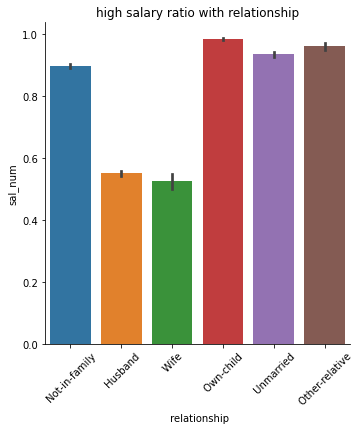

In [ ]:
# plot
r = sns.catplot(data=df,kind='bar',x=' relationship',y='sal_num')
r = plt.xlabel(' relationship')

plt.xticks(rotation=45)
plt.title('high salary ratio with relationship')
plt.show()

Documentation

In [ ]:
codes = {}
for i in columns:
    curr_codes = dict()
    if data_drop.dtypes[i]==np.object: # object 인 데이터를 모두 바꿔준다.
        curr_codes = dict(enumerate(data_drop[i].astype('category').cat.categories))
        data_drop[i] = data_drop[i].astype('category').cat.codes
        curr_codes = dict([(value, key) for key, value in curr_codes.items()])
        codes[i] = curr_codes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


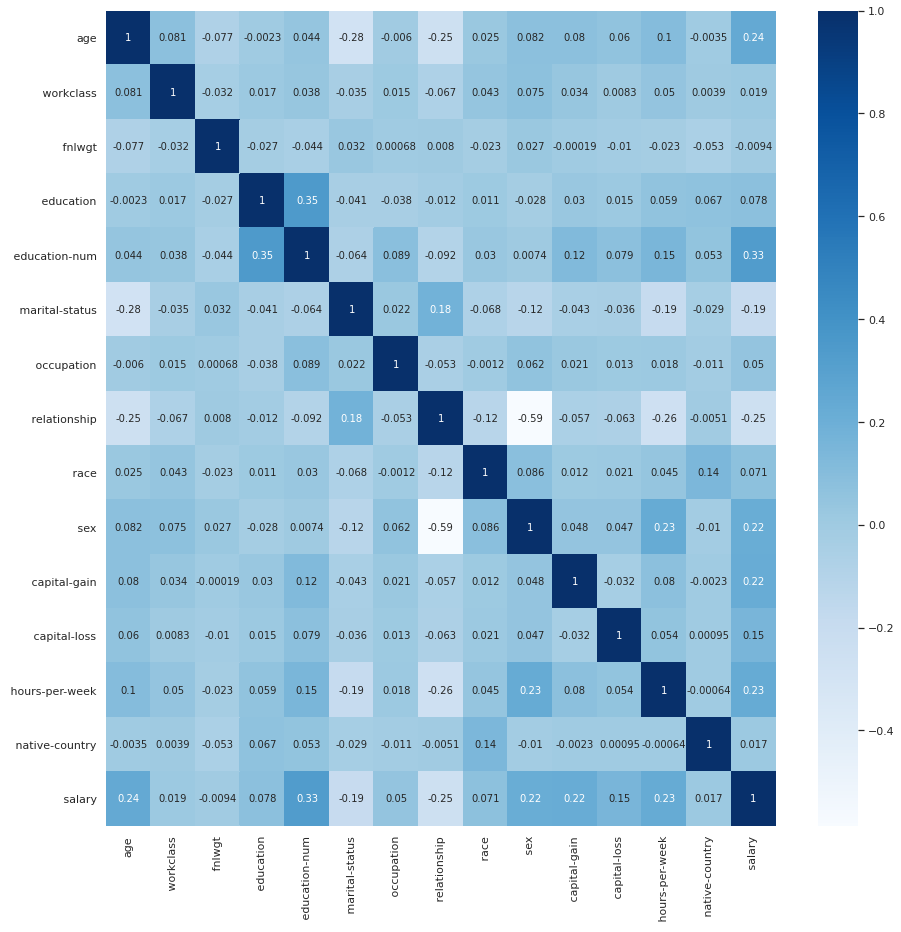

In [ ]:
sfig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(data_drop.corr() , annot=True,  annot_kws={"size": 10},cmap="Blues")

In [ ]:
data_drop.corr()[' salary'].sort_values()

 relationship     -0.251255
 marital-status   -0.194582
 fnlwgt           -0.009446
 native-country    0.016524
 workclass         0.019128
 occupation        0.050144
 race              0.070927
 education         0.078255
 capital-loss      0.151461
 sex               0.216626
 capital-gain      0.221871
 hours-per-week    0.228547
age                0.242431
 education-num     0.334640
 salary            1.000000
Name:  salary, dtype: float64

# Correlation with hours-per-week

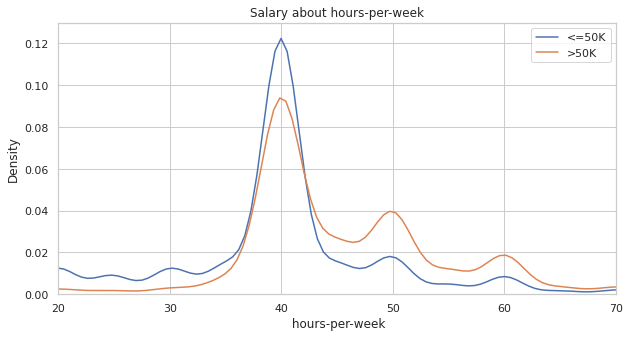

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
low_salary = ' <=50K'
high_salary = ' >50K'
sns.kdeplot(data=df[df[' salary']==low_salary][' hours-per-week'], ax=ax)
sns.kdeplot(data=df[df[' salary']==high_salary][' hours-per-week'], ax=ax)

plt.title('Salary about hours-per-week')
plt.legend(['<=50K', '>50K'])
plt.axis([20, 70, 0, 0.13])
plt.show()

- 고임금자 및 저임금자 둘다 주평균 근로시간이 40시간에서 최대 인것을 확인할 수 있으며,
- 고임금자의 경우 저 임금자 보다 주평균 40시간 일때, 더 많은 비중이 있는 것을 확인할 수 있다. 저임금자는 고임금자보다 주평균 40시간 이하일때, 더 많은 비중을 차지한다.